In [4]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
L = 11
H = hm.dense_H(L)
vals, vecs = la.eigh(H)

In [91]:
Z = np.zeros((2**L,2**L))
for i in range(L):
    Zi = 1
    for j in range(L):
        if (j==i): Zi = np.kron(Zi,hm.Z)
        else: Zi = np.kron(Zi,hm.I)
    Z += Zi

X = np.zeros((2**L,2**L))
for i in range(L):
    Xi = 1
    for j in range(L):
        if (j==i): Xi = np.kron(Xi,hm.X)
        else: Xi = np.kron(Xi,hm.I)
    X += Xi

Y = np.zeros((2**L,2**L), dtype=complex)
for i in range(L):
    Yi = 1
    for j in range(L):
        if (j==i): Yi = np.kron(Yi,hm.Y)
        else: Yi = np.kron(Yi,hm.I)
    Y += Yi
    
# print(Z@Z)
# vals, vecs = la.eigh(Z)
# print(vals)
    
S2 = X@X + Y@Y + Z@Z
vals2, _ = la.eigh(S2)
# print(hm.chop(S2))
print(hm.chop(vals2))
print(hm.chop(np.sqrt(vals2+1)-1)/2)

[  3   3   3 ..., 143 143 143]
[ 0.5  0.5  0.5 ...,  5.5  5.5  5.5]


In [68]:
# expectations of Z in eigs of H
valsH, vecsH = la.eigh(H)
Zs = []
for i, vec in enumerate(vecsH.T):
#     a = (Z@vec)
#     a = a[np.absolute(vec) > .0001]
#     a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): 
#         print("Z:", a[0])
#         Zs.append(a[0])
#     else: 
#         print("not an eig of Z", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
#         Zs.append(None)
#     print("should be", valsX[i], '\n')
    a = (vec.conj()@Z@vec)
#     print("z:", a)
#     print("should be", bin(i).count('1'), '\n')

In [29]:
Zs = np.array(np.real(Zs))
Zarr = Zs[Zs > -1E-10]
mask = np.isclose(Zs, np.min(np.min(Zarr)))
print(Zs[mask])

ValueError: zero-size array to reduction operation minimum which has no identity

In [42]:
alph2Sz, Sz2alph = hm.permutations(L)
diag = H.T
diag = H.T[alph2Sz]
diag = diag[:,alph2Sz]
print(np.all(np.isclose(diag, H.T[alph2Sz][:,alph2Sz])))

True


In [92]:
Hsmal = hm.mat2list(H)[(int)(L/2)]
Zsmal = hm.mat2list(Z)[(int)(L/2)]
Ssmal = hm.mat2list(S2)[(int)(L/2)]

In [93]:
# eigs of Hsmal
valsH, vecsH = la.eigh(Hsmal)
for i, vec in enumerate(vecsH.T):
#     a = (H@vec)
#     a = a[np.absolute(vec) > .0001]
#     a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): print("H:", a[0])
#     else: print("not an eig of H")
#     print("should be", valsH[i], '\n')
    a = (vec.conj()@Hsmal@vec)
    print(i, "H:", hm.chop(a), " should be", hm.chop(valsH[i]))

0 H: -11.641  should be -11.641
1 H: -11.168  should be -11.168
2 H: -10.622  should be -10.622
3 H: -10.177  should be -10.177
4 H: -10.106  should be -10.106
5 H: -10.04  should be -10.04
6 H: -9.917  should be -9.917
7 H: -9.834  should be -9.834
8 H: -9.557  should be -9.557
9 H: -9.5  should be -9.5
10 H: -9.442  should be -9.442
11 H: -9.413  should be -9.413
12 H: -8.899  should be -8.899
13 H: -8.549  should be -8.549
14 H: -8.113  should be -8.113
15 H: -8.097  should be -8.097
16 H: -8.045  should be -8.045
17 H: -8  should be -8
18 H: -7.758  should be -7.758
19 H: -7.727  should be -7.727
20 H: -7.716  should be -7.716
21 H: -7.583  should be -7.583
22 H: -7.553  should be -7.553
23 H: -7.44  should be -7.44
24 H: -7.301  should be -7.301
25 H: -7.203  should be -7.203
26 H: -6.855  should be -6.855
27 H: -6.813  should be -6.813
28 H: -6.686  should be -6.686
29 H: -6.618  should be -6.618
30 H: -6.46  should be -6.46
31 H: -6.451  should be -6.451
32 H: -6.438  should be 

302 H: 1.657  should be 1.657
303 H: 1.736  should be 1.736
304 H: 1.739  should be 1.739
305 H: 1.788  should be 1.788
306 H: 1.809  should be 1.809
307 H: 1.812  should be 1.812
308 H: 1.822  should be 1.822
309 H: 1.826  should be 1.826
310 H: 1.864  should be 1.864
311 H: 1.933  should be 1.933
312 H: 1.939  should be 1.939
313 H: 1.946  should be 1.946
314 H: 1.995  should be 1.995
315 H: 2  should be 2
316 H: 2.005  should be 2.005
317 H: 2.04  should be 2.04
318 H: 2.043  should be 2.043
319 H: 2.073  should be 2.073
320 H: 2.098  should be 2.098
321 H: 2.259  should be 2.259
322 H: 2.282  should be 2.282
323 H: 2.303  should be 2.303
324 H: 2.324  should be 2.324
325 H: 2.37  should be 2.37
326 H: 2.395  should be 2.395
327 H: 2.411  should be 2.411
328 H: 2.422  should be 2.422
329 H: 2.442  should be 2.442
330 H: 2.581  should be 2.581
331 H: 2.595  should be 2.595
332 H: 2.605  should be 2.605
333 H: 2.643  should be 2.643
334 H: 2.668  should be 2.668
335 H: 2.677  should b

In [33]:
# expectations of Z in eigs of Hsmal
valsH, vecsH = la.eigh(Hsmal)
Zs = []
for i, vec in enumerate(vecsH.T):
    a = (Zsmal@vec)
    a = a[np.absolute(vec) > .0001]
    a = a/vec[np.absolute(vec) > .0001]
    if np.all(np.isclose(a[0], a)): 
        print("Z:", a[0])
        Zs.append(a[0])
    else: 
        print("not an eig of Z", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
        Zs.append(None)
#     print("should be", valsX[i], '\n')
#     a = (vec.conj()@Zsmal@vec)
#     print("z:", a)

Z: (1+0j)
Z: (1+0j)
Z: (1-0j)
Z: (1+0j)
Z: (1-0j)
Z: (1-0j)
Z: (1+0j)
Z: (1+0j)
Z: (1+0j)
Z: (1-0j)
Z: (1+0j)
Z: (1+0j)
Z: (1+0j)
Z: (1-0j)
Z: (1-0j)
Z: (1-0j)
Z: (1-0j)
Z: (1-0j)
Z: (1+0j)
Z: (1-0j)
Z: (1-0j)
Z: (1+0j)
Z: (1-0j)
Z: (1-0j)
Z: (1+0j)
Z: (1+0j)
Z: (1+0j)
Z: (1-0j)
Z: (1+0j)
Z: (1-0j)
Z: (1-0j)
Z: (1+0j)
Z: (1+0j)
Z: (1+0j)
Z: (1+0j)


In [34]:
# expectations of S2 in eigs of Hsmal
valsH, vecsH = la.eigh(Hsmal)
Ss = []
for i, vec in enumerate(vecsH.T):
    a = (Ssmal@vec)
    a = a[np.absolute(vec) > .0001]
    a = a/vec[np.absolute(vec) > .0001]
    if np.all(np.isclose(a[0], a)): 
        print("S:", a[0])
        Ss.append(a[0])
    else: 
        print(str(i) + " is not an eig of S", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
#         Ss.append(None)
    print(i,vec.conj()@Ssmal@vec)
#     print("should be", valsX[i], '\n')
#     a = (vec.conj()@Zsmal@vec)
#     print("z:", a)

S: (3-1.17806544529e-15j)
0 (3-3.01182836604e-16j)
S: (15-1.06177869027e-15j)
1 (15-2.74202217484e-16j)
S: (3+3.47370425237e-15j)
2 (3-3.95695269535e-18j)
S: (15+1.92239046162e-14j)
3 (15+2.50686364336e-16j)
S: (3-6.75694995844e-14j)
4 (3-1.15268600374e-17j)
S: (35+4.91848233251e-14j)
5 (35-7.02555469381e-16j)
S: (15-6.30539274177e-14j)
6 (15-8.53082482896e-17j)
S: (3-9.29837435249e-14j)
7 (3+1.31115888179e-17j)
S: (15+6.30079404249e-15j)
8 (15+1.74555481714e-16j)
S: (15+1.39483701821e-15j)
9 (15-3.36499097042e-16j)
S: (35+1.61192620982e-14j)
10 (35+3.27612850756e-16j)
S: (3+4.23854079691e-16j)
11 (3-1.3560814101e-16j)
S: (3+4.18097961756e-14j)
12 (3+1.5096763231e-16j)
S: (15-6.85465262192e-15j)
13 (15+9.19212549414e-17j)
S: (35+3.07951976958e-14j)
14 (35+2.46261469184e-16j)
S: (3+1.44191816604e-14j)
15 (3+8.43639261026e-17j)
16 is not an eig of S (149.749142264-110.154751537j) (0.0225735136464-0.0199482791752j)
16 (35.0443294565-1.7763568394e-15j)
17 is not an eig of S (-15.1269151073

In [35]:
# eigs of Ssmal
valsS, vecsS = la.eigh(Ssmal)
for i, vec in enumerate(vecsS.T):
#     a = (H@vec)
#     a = a[np.absolute(vec) > .0001]
#     a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): print("H:", a[0])
#     else: print("not an eig of H")
#     print("should be", valsH[i], '\n')
    a = (vec.conj()@Ssmal@vec)
    print("S:", a)
#     print(str(i) + " should be", valsH[i], '\n')

S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (3+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (15+0j)
S: (35+0j)
S: (35+0j)
S: (35+0j)
S: (35+0j)
S: (35+0j)
S: (35+0j)
S: (63+0j)


In [36]:
# expectations of H in eigs of Ssmal
valsS, vecsS = la.eigh(Ssmal)
Hs = []
for i, vec in enumerate(vecsS.T):
    a = (Hsmal@vec)
    a = a[np.absolute(vec) > .0001]
    a = a/vec[np.absolute(vec) > .0001]
    if np.all(np.isclose(a[0], a)): 
        print("H:", a[0])
        Hs.append(a[0])
    else: 
        print(str(i) + " is not an eig of H", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
#         Ss.append(None)
    print(vec.conj()@Hsmal@vec)
#     print("should be", valsX[i], '\n')
#     a = (vec.conj()@Zsmal@vec)
#     print("z:", a)

0 is not an eig of H (-0+5.60436418626j) (0.00357796841743+0j)
-4.46971482679e-17j
1 is not an eig of H (-0+14.7669113688j) (-0.00110655972546+0j)
-1.36880464913e-16j
2 is not an eig of H (-0+0.634136630768j) (0.0118959560349+0j)
-5.94527320277e-17j
3 is not an eig of H 9.65479203859e-16j (0.105409255339+0j)
-5.6690932804e-17j
4 is not an eig of H (-0-11.145838485j) (0.0122367321294+0j)
-1.70962801342e-17j
5 is not an eig of H -9.93371755992j (0.0221598445454+0j)
3.23896663833e-17j
6 is not an eig of H 1.68862952365j (0.0096772276802+0j)
-3.94015667039e-17j
7 is not an eig of H (-0+8.4647185212j) (0.00600031373506+0j)
3.26366076533e-17j
8 is not an eig of H (-0-19.8946676408j) (0.00132164368095+0j)
-7.65306250559e-17j
9 is not an eig of H -0.120359060512j (-0.00832872232912+0j)
-3.01936636864e-17j
10 is not an eig of H (-0+2.8463131521j) (-0.007053912776+0j)
-4.55255290815e-17j
11 is not an eig of H (-0-5.6700332524j) (-0.0232203309166+0j)
7.8185733136e-18j
12 is not an eig of H 3.8413

In [37]:
np.round(np.absolute(valsS))
# print((int)(np.round(np.absolute(valsS))))

array([  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  35.,  35.,  35.,  35.,  35.,
        35.,  63.])

[[  3.50000000e+01   1.17242916e-14   7.82005006e-14 ...,   4.47545209e-15
    1.51515956e-15   8.05930348e-15]
 [  1.12884693e-14   1.50000000e+01   1.60461798e-13 ...,   3.72380123e-16
    1.58401437e-15   2.39664212e-15]
 [  7.76685095e-14   1.59933694e-13   3.00000000e+00 ...,   1.14640944e-15
    3.42223265e-15   6.64956505e-15]
 ..., 
 [  3.77372018e-15   2.45228796e-16   1.69309367e-15 ...,   3.00000000e+00
    3.37087695e-14   2.24726860e-14]
 [  2.05845536e-15   1.16738512e-15   3.45029827e-15 ...,   3.35456418e-14
    1.50000000e+01   1.67014434e-14]
 [  1.07102002e-14   2.61610104e-15   6.85399761e-15 ...,   2.25550217e-14
    1.68194437e-14   3.50000000e+01]]


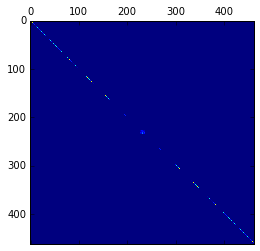

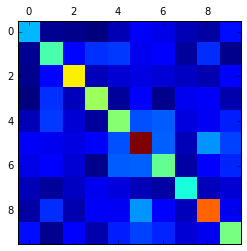

[[ 27.22267889   4.80088129   4.50381019   3.33976931   7.13520245
   11.85754684  10.46310937   7.06151097   6.00760732  14.25017811]
 [  4.80088129  37.61667233  13.3892035   16.82045868  17.41826969
   11.22181847  12.9147781    5.24349161  16.50659478   4.34159547]
 [  4.50381019  13.3892035   54.48924975   7.53986359   9.17569848
   10.28177771   9.2139382    8.13662433   6.89293208  12.08657549]
 [  3.33976931  16.82045868   7.53986359  45.46512822   5.21423016
   13.24209285   4.27588799  11.10470696  11.56623802   6.54839695]
 [  7.13520245  17.41826969   9.17569848   5.21423016  43.29432455
   19.28078154  20.16091279   9.95935389  11.31683822  15.31661873]
 [ 11.85754684  11.22181847  10.28177771  13.24209285  19.28078154
   81.2956479   20.55118956   7.29615046  24.56619745  18.20664608]
 [ 10.46310937  12.9147781    9.2139382    4.27588799  20.16091279
   20.55118956  39.93249044   5.89199744  12.55309395  16.01446847]
 [  7.06151097   5.24349161   8.13662433  11.10470696  

In [94]:
mat = vecsH.conj().T@Ssmal@vecsH
print(np.absolute(mat))
plt.matshow(np.absolute(mat))
plt.show()
vals = np.round(valsS).astype('int')
counts = np.bincount(vals)
mask = (np.isclose(valsH, 0))
plt.matshow(np.absolute(mat)[mask][:,mask])
plt.show()
print(np.absolute(mat)[mask][:,mask])

In [101]:
vals# What are their total spin?

array([11, 15, 19])

In [96]:
Stiny = (vecsH.conj().T@Ssmal@vecsH)[mask][:,mask]
spins, _ = la.eigh(Stiny)
print(spins)

[  15.   15.   15.   15.   15.   63.   63.   63.   63.  143.]


In [81]:
Htiny = Hsmal[mask][:,mask]
valsH, vecsH = la.eigh(Htiny)
print(hm.chop(valsH))
Stiny = Ssmal[mask][:,mask]
valsS, vecsS = la.eigh(Stiny)
print(hm.chop(valsS))

[0 0 0]
[11 15 19]


In [98]:
np.argmax(counts)

11

In [ ]:
print(np.max(np.absolute(H@Z - Z@H)))

In [50]:
np.shape(Ssmal)

(21, 21)